<h2>Modul 5 Transfer Learning Text Classification</h2>
Clarissa Sanindita Reikisyifa - 202010370311232

1. Import library yang diperlukan
2. Load Dataset
3. Melakukan Exploration Data Analyst
4. Lakukan Pre-processing dan Data Augmentation yang menurut kamu memberikan dataset yang lebih efisien
5. Implementasikan transfer learning dengan menggunakan model **BERT** (Bidirectional Encoder Representations from Transformers) atau lainnya
6. Lakukan Fit Model dengan epoch yang anda tentukan
7. Evaluate Model dengan menampilkan Plot, Loss, Accuracy serta Classification Report
8. Lakukan predict pada data test hasil splitting kemudian lakukan perbandingan antara true label dan predict labelnya
9. Demonstrasikan hasil tersebut kepada esisten

### Import Library

In [122]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


### Load Dataset

In [104]:
url = 'G:/My Drive/Batik Project/GAN/Icha/BatikGAN//cleaned_reviews.csv'
df = pd.read_csv(url)
df.tail()

,sentiments,cleaned_review,cleaned_review_length,review_score
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0
17339,neutral,mono speaker,2,5.0


In [ ]:
df.info()

In [ ]:
df.describe()

### Processing Data

In [105]:
df.isnull().sum()

sentiments               0
cleaned_review           3
cleaned_review_length    0
review_score             0
dtype: int64

In [106]:
df.dropna(subset=['cleaned_review'], inplace=True)
df

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0
...,...,...,...,...
17335,positive,i love this speaker and love can take it anywh...,30,5.0
17336,positive,i use it in my house easy to connect and loud ...,13,4.0
17337,positive,the bass is good and the battery is amazing mu...,41,5.0
17338,positive,love it,2,5.0


In [107]:
df.duplicated().sum()

1347

In [108]:
df = df.drop_duplicates()

In [109]:
# Define sentiment labels mapping
sentiment_labels = {'positive': 2, 'neutral': 1, 'negative': 0}
df['sentiments'] = df['sentiments'].map(sentiment_labels)

C:\Users\riset\AppData\Local\Temp\ipykernel_19764\1672668950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiments'] = df['sentiments'].map(sentiment_labels)


### Spliting Feature & Label

In [110]:
# Membaca dataset (pastikan df sudah terdefinisi)
X = df['cleaned_review']
y = df['sentiments']

### Spliting Train, Val, dan Test

In [111]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [112]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

### Normalisasi Data

In [113]:
# Function to encode the text using BERT tokenizer
def encode_reviews(reviews, max_length=100):
    return tokenizer.batch_encode_plus(
        reviews.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

In [114]:
# Encoding the reviews
encoded_X_train = encode_reviews(X_train)
encoded_X_test = encode_reviews(X_test)

In [115]:
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)


### Model

In [116]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [117]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


### Training Model

In [118]:
history = model.fit(
    {'input_ids': encoded_X_train['input_ids'], 'attention_mask': encoded_X_train['attention_mask']},
    y_train_one_hot,
    validation_split=0.1,
    epochs=10,  # You can adjust the number of epochs
    batch_size=32  # And the batch size
)

Epoch 1/10
360/360 [==============================] - 51s 114ms/step - loss: 0.4330 - accuracy: 0.8171 - val_loss: 0.3083 - val_accuracy: 0.8648
Epoch 2/10
360/360 [==============================] - 40s 111ms/step - loss: 0.2182 - accuracy: 0.9154 - val_loss: 0.2231 - val_accuracy: 0.9094
Epoch 3/10
360/360 [==============================] - 40s 110ms/step - loss: 0.1232 - accuracy: 0.9547 - val_loss: 0.2635 - val_accuracy: 0.9031
Epoch 4/10
360/360 [==============================] - 40s 111ms/step - loss: 0.0844 - accuracy: 0.9708 - val_loss: 0.2397 - val_accuracy: 0.9219
Epoch 5/10
360/360 [==============================] - 40s 111ms/step - loss: 0.0597 - accuracy: 0.9798 - val_loss: 0.2829 - val_accuracy: 0.9156
Epoch 6/10
360/360 [==============================] - 40s 111ms/step - loss: 0.0459 - accuracy: 0.9831 - val_loss: 0.2804 - val_accuracy: 0.9187
Epoch 7/10
360/360 [==============================] - 40s 111ms/step - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.3703 - val_ac

### Evaluasi Model

In [119]:
test_loss, test_accuracy = model.evaluate(
    {'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']},
    y_test_one_hot
)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

100/100 [==============================] - 6s 39ms/step - loss: 0.3992 - accuracy: 0.9209
Test Accuracy: 92.09%


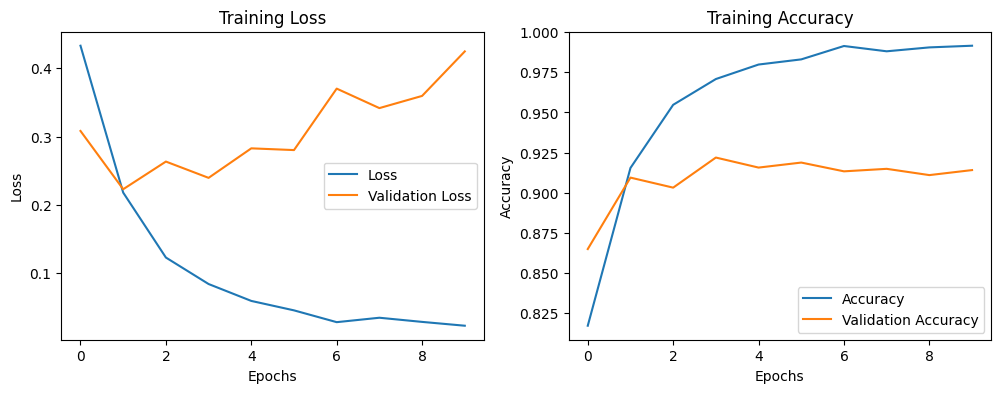

In [120]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training_history(history)


### Clasification Report

In [123]:
test_pred = model.predict({'input_ids': encoded_X_test['input_ids'], 'attention_mask': encoded_X_test['attention_mask']})
test_pred_labels = np.argmax(test_pred.logits, axis=1)

report = classification_report(y_test, test_pred_labels, target_names=['negative', 'neutral', 'positive'])
print(report)

100/100 [==============================] - 4s 37ms/step
              precision    recall  f1-score   support

    negative       0.88      0.71      0.78       266
     neutral       0.89      0.90      0.90      1146
    positive       0.94      0.97      0.96      1786

    accuracy                           0.92      3198
   macro avg       0.90      0.86      0.88      3198
weighted avg       0.92      0.92      0.92      3198



### Perbandingan antara true label dan predict label

In [124]:
comparison = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': test_pred_labels})
comparison = comparison.replace({0: 'negative', 1: 'neutral', 2: 'positive'})

print(comparison.head(20))

      Actual Label Predicted Label
17328     positive        positive
15981      neutral        positive
150        neutral         neutral
1696      positive        positive
8455       neutral         neutral
5447       neutral         neutral
1043       neutral         neutral
123       positive        positive
88         neutral         neutral
5663      positive        positive
9250      positive        positive
6024      positive        positive
9322      positive        positive
5050      positive        positive
14130      neutral         neutral
13908      neutral         neutral
13049     positive        positive
10917      neutral         neutral
14240     positive        positive
9905       neutral         neutral
